## Working with old customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_excel('KPMG_RAW.xlsx',sheet_name=3,skiprows=1)

### Exploratory Data Analysis

#### Understanding dataset

In [6]:
#df.shape(4000,13)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [7]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [8]:
df['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [9]:
df['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [10]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### Adding new columns

In [12]:
#for age calculation
def agee(born):
    today = datetime.date.today()
    return today.year -born.year -((today.month , today.day)<(born.month,born.day))

In [13]:
df['DOB']=pd.to_datetime(df['DOB'])
df['age']=df['DOB'].apply(lambda x: agee(x))

In [48]:
#after removing age outliers
df['agebin']=pd.cut(df['age'],bins=[16,28,38,48,58,68,78])

#### Treating Outliers

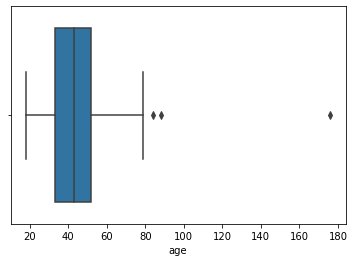

In [14]:
sns.boxplot(x='age',data=df)

In [50]:
tmp = df[df['age']>78]
df.drop(tmp.index,axis=0,inplace=True)

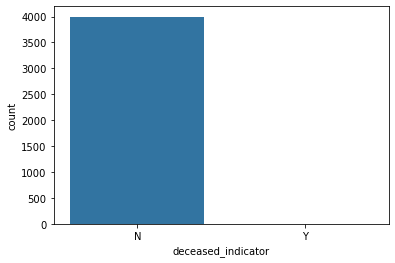

In [16]:
sns.countplot(x='deceased_indicator',data=df)

In [18]:
df.drop(df[df['deceased_indicator']=='Y'].index,axis=0,inplace=True)

#### Treating missing values and cleaning dataset

In [19]:
df.replace({'F':'Female','Femal':'Female','U':'Male','M':'Male'},inplace=True)

In [23]:
df.drop(df[df['age'].isnull()].index,axis=0,inplace=True)

In [33]:
df.drop(['first_name','last_name','DOB','job_title','deceased_indicator','default'],axis=1,inplace=True)

In [34]:
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,agebin
0,1,Female,93,Health,Mass Customer,Yes,11.0,66.0,"(58, 68]"
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,39.0,"(38, 48]"
2,3,Male,61,Property,Mass Customer,Yes,15.0,66.0,"(58, 68]"
3,4,Male,33,IT,Mass Customer,No,7.0,58.0,"(48, 58]"
4,5,Female,56,NaN,Affluent Customer,Yes,8.0,43.0,"(38, 48]"


#### Univariate Analysis

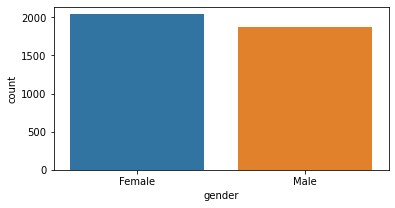

In [38]:
plt.figure(figsize=(6,3))
sns.countplot(x='gender',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

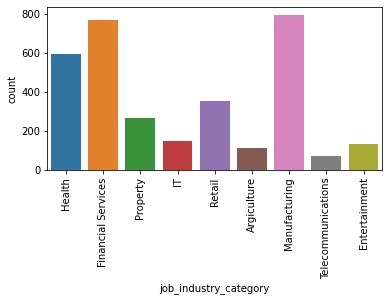

In [39]:
plt.figure(figsize=(6,3))
sns.countplot(x='job_industry_category',data=df)
plt.xticks(rotation=90)

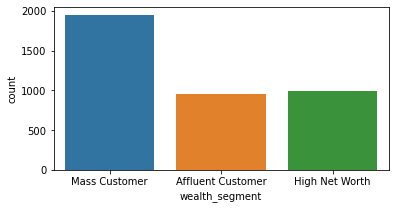

In [40]:
plt.figure(figsize=(6,3))
sns.countplot(x='wealth_segment',data=df)

#### Bivariate Analysis

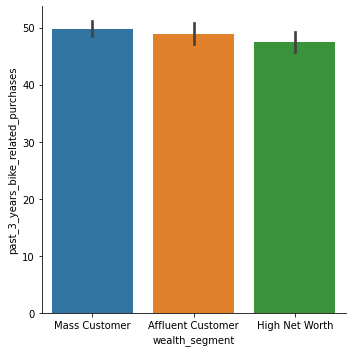

In [43]:
sns.catplot(x='wealth_segment', y='past_3_years_bike_related_purchases',kind='bar',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

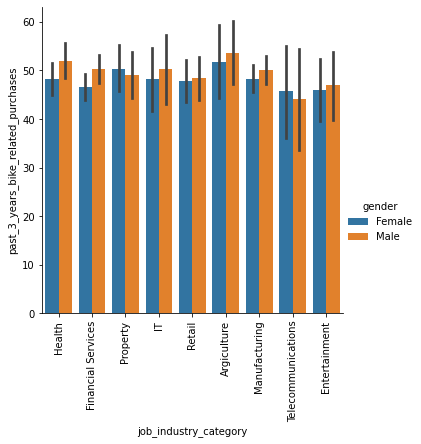

In [42]:
sns.catplot(x='job_industry_category', y='past_3_years_bike_related_purchases',kind='bar',hue='gender',data=df)
plt.xticks(rotation=90)

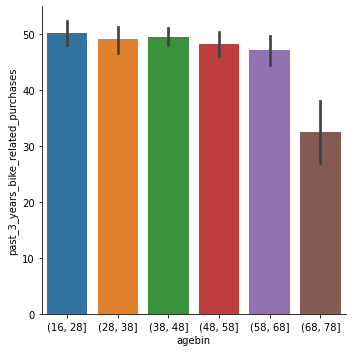

In [49]:
sns.catplot(x='agebin', y='past_3_years_bike_related_purchases',kind='bar',data=df)


## Working with new customers

In [54]:
newdf = pd.read_excel('KPMG_RAW.xlsx',sheet_name=2,skiprows=1)

### Exploratory Data Analysis

#### Understanding dataset

In [55]:
#newdf.shape(1000,23)
newdf.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [56]:
newdf['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [57]:
newdf['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [58]:
newdf['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [59]:
newdf.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

#### Adding new columns

In [60]:
newdf['DOB']=pd.to_datetime(newdf['DOB'])
newdf['age']=newdf['DOB'].apply(lambda x: agee(x))

In [67]:
#after removing age outliers
newdf['agebin']=pd.cut(newdf['age'],bins=[18,28,38,48,58,68,78])

#### Treating Outliers

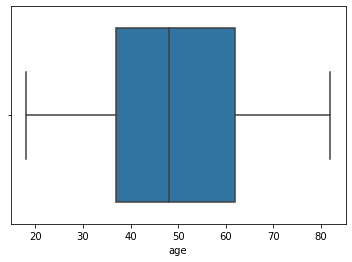

In [61]:
sns.boxplot(x='age',data=newdf)

In [65]:
tmp = newdf[newdf['age']>78]
newdf.drop(tmp.index,axis=0,inplace=True)

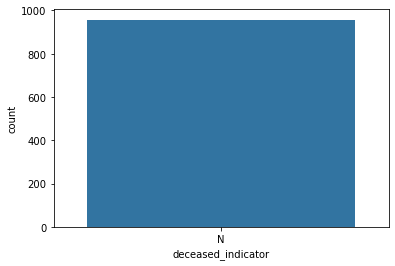

In [66]:
sns.countplot(x='deceased_indicator',data=newdf)

#### Treating missing values and cleaning dataset

In [68]:
newdf.replace({'U':'Female'},inplace=True)

In [69]:
newdf.drop(newdf[newdf['age'].isnull()].index,axis=0,inplace=True)

In [71]:
newdf.drop(['first_name','last_name','DOB','job_title','deceased_indicator','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','country','address','postcode','property_valuation'],axis=1,inplace=True)

In [72]:
newdf.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,Rank,Value,age,agebin
0,Male,86,Manufacturing,Mass Customer,Yes,14,QLD,1,1.718750,63.0,"(58, 68]"
1,Male,69,Property,Mass Customer,No,16,NSW,1,1.718750,50.0,"(48, 58]"
2,Female,10,Financial Services,Affluent Customer,No,10,VIC,1,1.718750,45.0,"(38, 48]"
3,Female,64,Manufacturing,Affluent Customer,Yes,5,QLD,4,1.703125,41.0,"(38, 48]"
4,Female,34,Financial Services,Affluent Customer,No,19,NSW,4,1.703125,54.0,"(48, 58]"


#### Univariate Analysis

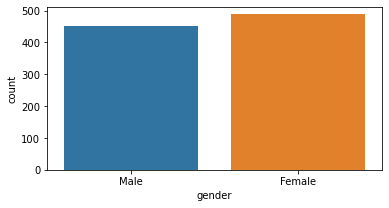

In [73]:
plt.figure(figsize=(6,3))
sns.countplot(x='gender',data=newdf)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

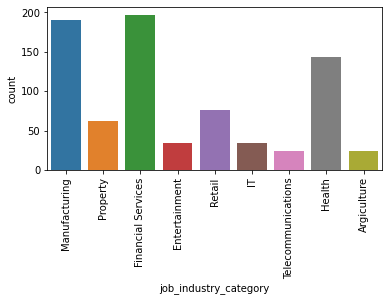

In [74]:
plt.figure(figsize=(6,3))
sns.countplot(x='job_industry_category',data=newdf)
plt.xticks(rotation=90)

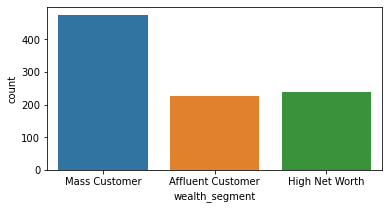

In [75]:
plt.figure(figsize=(6,3))
sns.countplot(x='wealth_segment',data=newdf)

#### Bivariate Analysis

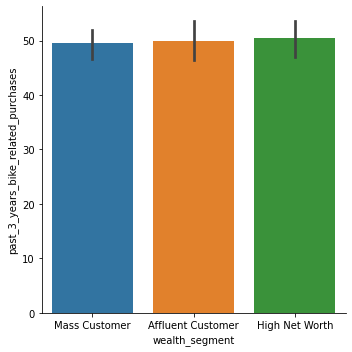

In [76]:
sns.catplot(x='wealth_segment', y='past_3_years_bike_related_purchases',kind='bar',data=newdf)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

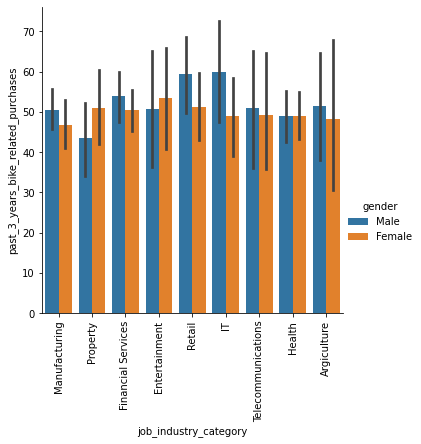

In [77]:
sns.catplot(x='job_industry_category', y='past_3_years_bike_related_purchases',kind='bar',hue='gender',data=newdf)
plt.xticks(rotation=90)

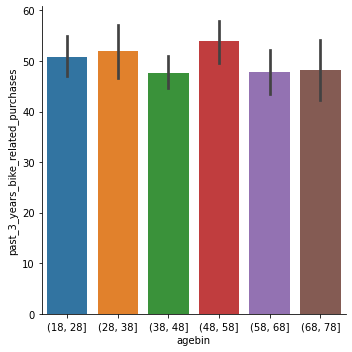

In [78]:
sns.catplot(x='agebin', y='past_3_years_bike_related_purchases',kind='bar',data=newdf)